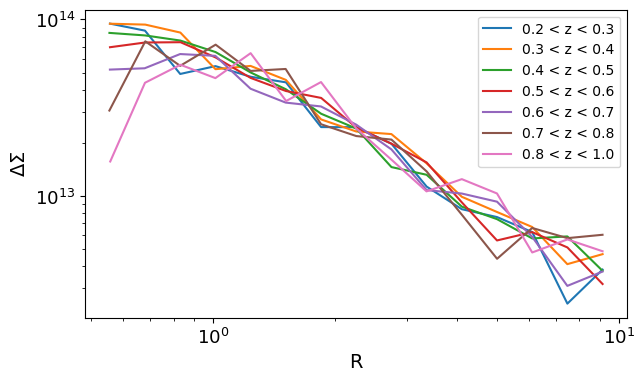

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append('../')
import _redshift_richness_bins as analysis

plt.figure(figsize=(7,4))
index = 12
fmt = ['-', '--', '.']
suff = '_full_coverage'
path_to_data = '../../CLCosmo_Sim_database/data/'
data_true = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles_true = data_true['stacked profile']
z = data_true['stacked profile']['z_mean']
for z_bin in analysis.Z_bin:
    mask = (z > z_bin[0])*(z < z_bin[1])
    r = np.mean(profiles_true['radius'][mask], axis=0)
    ds = np.mean(profiles_true['gt'][mask], axis=0)
    plt.loglog(r, ds, label=f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}')
plt.xscale('log')
plt.ylabel(r'$\Delta\Sigma$', fontsize=14)
plt.xlabel('R', fontsize=14)
plt.legend()
plt.tick_params(axis='both', which="both", labelsize= 13)
plt.savefig('../fig/stacked_redmapper_profiles_attenuation.png', bbox_inches='tight', dpi=100)

142
73
14
6
312
139
21
7


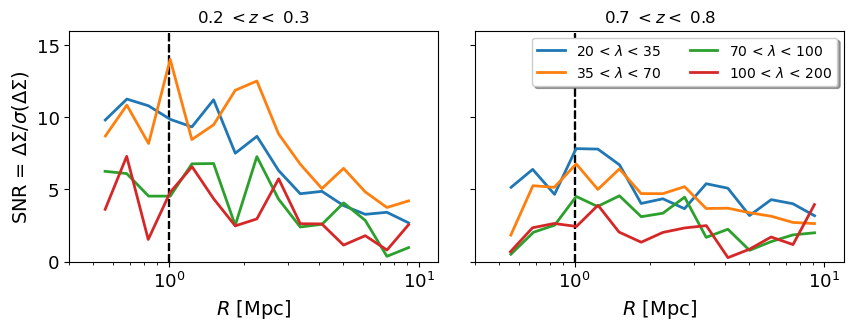

In [2]:
data = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(1,2, figsize = (10, 3))
fig.subplots_adjust(wspace=0.1, hspace=0.1)
for i, z_bin in enumerate([Z_bin[0], Z_bin[5]]):
    for j, m_bin in enumerate(Obs_bin):

            label_z =   f'{z_bin[0]:.1f} $< z <$ {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            N = len(f_cut['z_individual'][0])
            print(N)
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[i].errorbar(f_cut['radius'][0], f_cut['gt'][0]/err[0] ,lw=2,
                            marker = ' ',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[i].set_ylim(0, 16)
            axs[i].set_xlim(0.4, 12)
            axs[i].set_xscale('log')
            #axs[i].set_yscale('log')
            axs[i].vlines(1, 0, 1e19, ls='--', color='k')
            axs[i].tick_params(axis='both', which = 'major', labelsize= 13)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[i].set_xlabel(r'$R$ [Mpc]', fontsize = 14)
            axs[i].set_title(label_z, fontsize = 12)
            axs[0].set_ylabel(r'SNR = $\Delta\Sigma/\sigma(\Delta\Sigma)$', fontsize=14)
            #axs[i].grid('True', which='both')
        #except: a=1
        
axs[1].legend(loc='upper right',# bbox_to_anchor=(-2.5, 1.4),
      #fancybox=True,
           ncol=2,
           shadow=True)

for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('../fig/snr_ds_profiles.png', bbox_inches='tight', dpi=300)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


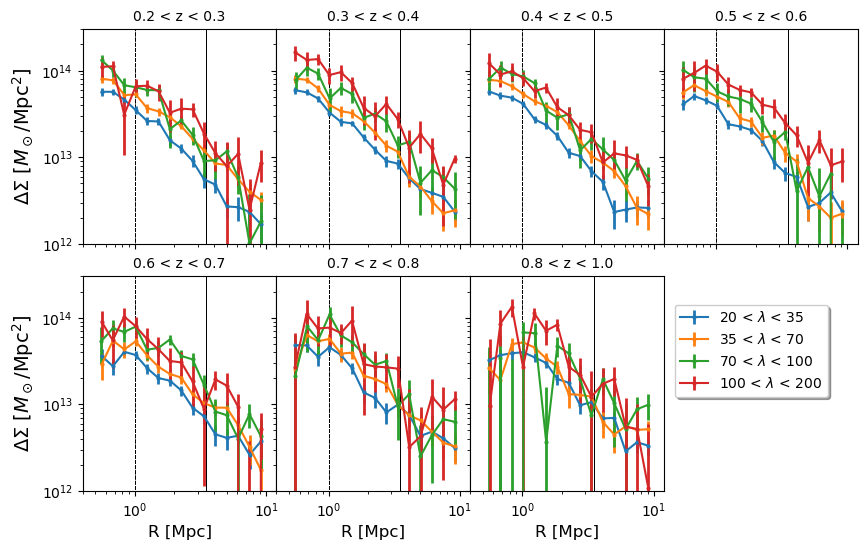

In [4]:
data = np.load(path_to_data + f'stacked_esd_profiles_redmapper_true{suff}.pkl', allow_pickle=True)
profiles = data['stacked profile']
covariances = data['stacked covariance']
Z_bin = analysis.Z_bin
Obs_bin = analysis.Obs_bin
n_z_bin = len(Z_bin) 
n_m_bin = len(Obs_bin) 
fig, axs = plt.subplots(2,4, figsize = (10,6))
fig.subplots_adjust(wspace=0, hspace=0.15)
index_z = [0,1,2,3,0,1,2]
for iz, z_bin in enumerate(Z_bin):
    i = index_z[iz]
    if iz <= 3:
        n = 0
    else: n=1
    for j, m_bin in enumerate(Obs_bin):

            label_z = f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
            label_M = f'{m_bin[0]:.0f} < ' + r'$\lambda$' +f' < {m_bin[1]:.0f}'
            mask_z = (profiles['z_mean'] > z_bin[0])*(profiles['z_mean'] < z_bin[1])
            mask_m = (profiles['obs_mean'] > m_bin[0])*(profiles['obs_mean'] < m_bin[1])
            index = np.arange(len(profiles))
            index_cut = index[mask_m * mask_z]
            f_cut = profiles[index_cut]
            cov = np.array(covariances['cov_t'][index_cut])
            err = cov.T.diagonal()**.5
            axs[n,i].errorbar(f_cut['radius'][0], f_cut['gt'][0] , err[0],
                            marker = 'o',fmt = '-', elinewidth = 2,  markersize = 2, markerfacecolor = None, label = label_M)
            axs[n,i].set_ylim(1e12, 3e14)
            axs[n,i].set_xlim(0.4, 12)
            axs[n,i].set_xscale('log')
            axs[n,i].set_yscale('log')
            axs[n,i].vlines(1, 0, 1e19, ls='--', color='k', lw=.7, zorder=0)
            axs[n,i].vlines(3.5, 0, 1e19, ls='-', color='k',lw=.7,zorder=0)
            axs[n,i].tick_params(axis='both', which = 'major', labelsize= 10)
            #axs[0].legend(frameon = False, loc = 'upper right', fontsize = 10)
            axs[n,i].set_xlabel('R [Mpc]', fontsize = 12)
            axs[n,i].set_title(label_z, fontsize = 10)
            axs[n,i].set_ylabel(r'$\Delta\Sigma\ [M_\odot/$Mpc$^2]$', fontsize=14)
        #except: a=1
        

        
    axs[1,2].legend(loc='upper center', bbox_to_anchor=(1.45, .9),
          ncol=1, fancybox=True, shadow=True)
fig.delaxes(axs[1,3])
for ax in fig.get_axes():
    ax.label_outer()
plt.savefig('../fig/stacked_redmapper_profiles.png', bbox_inches='tight', dpi=300)

In [7]:
import pickle
def load(filename, **kwargs):
    """Loads GalaxyCluster object to filename using Pickle"""
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)
table_redmapper = load(path_to_data + 'lens_catalog_cosmoDC2_v1.1.4_redmapper_v0.8.1.pkl')
N_obs, proxy_edges, z_edges = np.histogram2d(table_redmapper['redshift'], 
                                                        table_redmapper['richness'],
                                                   bins=[analysis.z_corner, analysis.rich_corner])

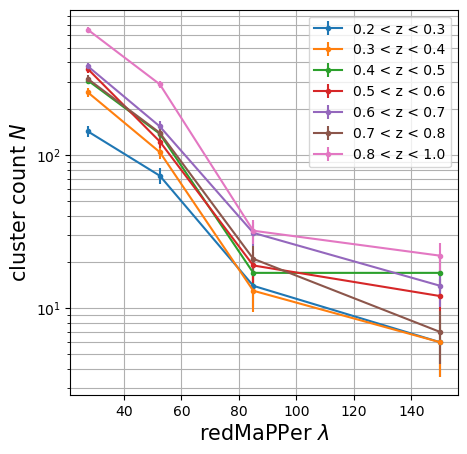

In [6]:
plt.figure(figsize=(5,5))
color = ['C0','C1','C2','C3','C4','C5']
for i, z_bin in enumerate(Z_bin):
    z0 = z_bin[0]
    z1 = z_bin[1]
    label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
    #plt.stairs( N_obs.T[:,i], analysis.rich_corner, color = color[i])
    plt.errorbar(np.mean(Obs_bin, axis=1), N_obs.T[:,i],  N_obs.T[:,i]**.5, 
                 marker = '.',  fmt='-', label = label_z)
plt.xlabel(r'redMaPPer $\lambda$', fontsize=15)
plt.ylabel(r'cluster count $N$', fontsize=15)
plt.legend(fontsize=10)
plt.grid(which='both')
plt.yscale('log')
plt.savefig('../fig/cluster_count.png', bbox_inches='tight', dpi=300)

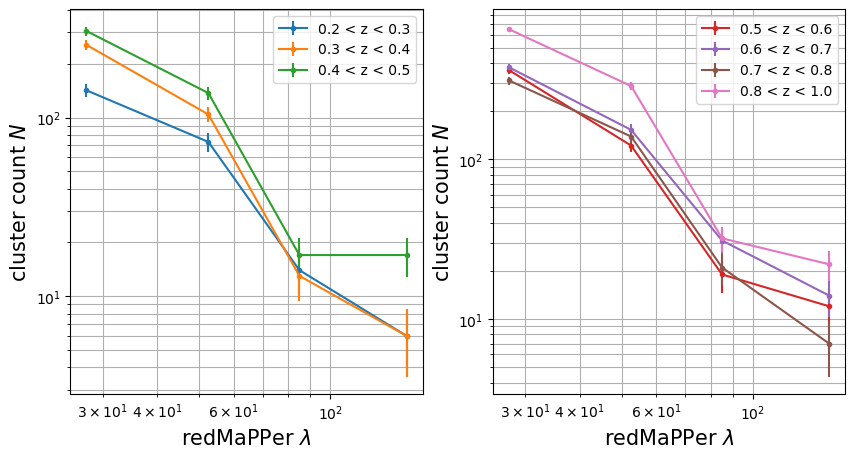

In [15]:
plt.figure(figsize=(10,5))
color = ['C0','C1','C2','C3','C4','C5']
for i, z_bin in enumerate(Z_bin):
    z0 = z_bin[0]
    z1 = z_bin[1]
    label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
    #plt.stairs( N_obs.T[:,i], analysis.rich_corner, color = color[i])
    if i < 3: 
        plt.subplot(121)
    else: 
        plt.subplot(122)
    plt.errorbar(np.mean(Obs_bin, axis=1), N_obs.T[:,i],  N_obs.T[:,i]**.5, 
                 marker = '.',  fmt='-', label = label_z, color = 'C'+str(i))
    
    plt.xlabel(r'redMaPPer $\lambda$', fontsize=15)
    plt.ylabel(r'cluster count $N$', fontsize=15)
    plt.legend(fontsize=10)
    plt.yscale('log')
    plt.xscale('log')
plt.ylim(3, 400)

plt.subplot(121)
plt.grid(which='both')

plt.subplot(122)
plt.grid(which='both')
#plt.savefig('../fig/cluster_count_new.png', bbox_inches='tight', dpi=300)

[142. 142. 142.] [20.  27.5 35. ]
[73. 73. 73.] [35.  52.5 70. ]
[14. 14. 14.] [ 70.  85. 100.]
[6. 6. 6.] [100. 150. 200.]
[255. 255. 255.] [20.  27.5 35. ]
[104. 104. 104.] [35.  52.5 70. ]
[13. 13. 13.] [ 70.  85. 100.]
[6. 6. 6.] [100. 150. 200.]
[305. 305. 305.] [20.  27.5 35. ]
[137. 137. 137.] [35.  52.5 70. ]
[17. 17. 17.] [ 70.  85. 100.]
[17. 17. 17.] [100. 150. 200.]
[362. 362. 362.] [20.  27.5 35. ]
[122. 122. 122.] [35.  52.5 70. ]
[19. 19. 19.] [ 70.  85. 100.]
[12. 12. 12.] [100. 150. 200.]
[377. 377. 377.] [20.  27.5 35. ]
[153. 153. 153.] [35.  52.5 70. ]
[31. 31. 31.] [ 70.  85. 100.]
[14. 14. 14.] [100. 150. 200.]
[312. 312. 312.] [20.  27.5 35. ]
[139. 139. 139.] [35.  52.5 70. ]
[21. 21. 21.] [ 70.  85. 100.]
[7. 7. 7.] [100. 150. 200.]
[653. 653. 653.] [20.  27.5 35. ]
[288. 288. 288.] [35.  52.5 70. ]
[32. 32. 32.] [ 70.  85. 100.]
[22. 22. 22.] [100. 150. 200.]


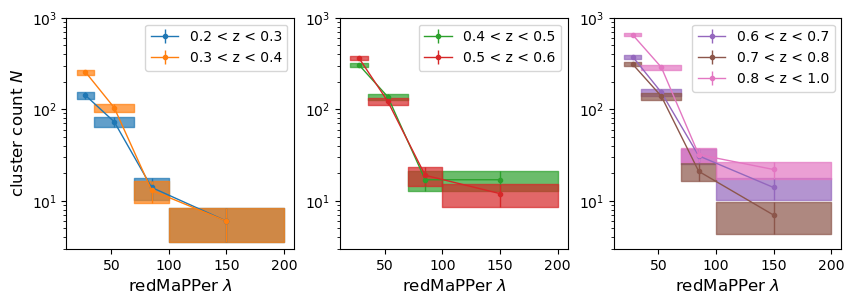

In [54]:
plt.figure(figsize=(10,3))
color = ['C0','C1','C2','C3','C4','C5']
for i, z_bin in enumerate(Z_bin):
    z0 = z_bin[0]
    z1 = z_bin[1]
    label_z =   f'{z_bin[0]:.1f} < z < {z_bin[1]:.1f}'
    #plt.stairs( N_obs.T[:,i], analysis.rich_corner, color = color[i])
    if i < 2: 
        plt.subplot(131)
    elif i < 4: 
        plt.subplot(132)
    else:
        
        plt.subplot(133)

    plt.errorbar(np.mean(Obs_bin, axis=1), N_obs.T[:,i],  N_obs.T[:,i]**.5, 
                 marker = '.',  fmt='-', lw=1, label = label_z, color = 'C'+str(i))
    
    for j in range(len(Obs_bin)):
        lambda_min, lambda_max = Obs_bin[j]
        x = np.linspace(lambda_min, lambda_max, 3)
        obs, obs_err = N_obs.T[j,i],  N_obs.T[j,i]**.5
        obs, obs_err = obs + 0*x, obs_err + 0*x
        print(obs, x)
        plt.fill_between(x, obs - obs_err, obs+obs_err, color='C'+str(i), alpha=.7)
    
    plt.xlabel(r'redMaPPer $\lambda$', fontsize=12)
    plt.legend(fontsize=10)
    plt.yscale('log')
    #plt.xscale('log')
    plt.ylim(3, 1000)


plt.subplot(131)
plt.ylabel(r'cluster count $N$', fontsize=12)
#plt.grid(which='both')
plt.savefig('../fig/cluster_count_new.png', bbox_inches='tight', dpi=300)